In [1]:
# Dependencies and Setup
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.colors as mcolors

In [2]:
# Pull NBA draft CSV
draft_path = Path("Resources/cleaned_draft_data.csv")
draft_data = pd.read_csv(draft_path)
draft_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain


In [3]:
# Pull NBA salary CSV
salaries_path = Path("Resources/cleaned_salary_data.csv")
salaries = pd.read_csv(salaries_path)
salaries.head()

,_id,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,2844000,6.304225e+06
1,abdulka01,8560000,2.406022e+07
2,abdulma02,19849500,4.177226e+07
3,abdulta01,37982800,6.558494e+07
4,abdursh01,95866000,1.630366e+08


In [4]:
# Merge data
full_data = pd.merge(draft_data, salaries, on="_id")
full_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt,2844000,6.304225e+06
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi,19849500,4.177226e+07
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France,37982800,6.558494e+07
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia,95866000,1.630366e+08
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain,11719764,1.504430e+07


In [5]:
# Print total number of rows
full_data.count()

_id                            1535
Name                           1535
Month                          1535
Day                            1535
Year                           1535
Position                       1535
College                        1535
Draft Year                     1535
Draft Round                    1535
Draft Pick                     1535
Career Games Played            1535
Career Points Per Game         1535
Total Career Points            1535
Birth City                     1535
Birth State/Country            1532
Total Earnings                 1535
Inflation-Adjusted Earnings    1535
dtype: int64

## What birth month produces the most NBA players?

In [6]:
# Group data by month and sort by highest number of rows
months_data = full_data.groupby(["Month"])
most_players = months_data.size().sort_values(ascending=False)
display(most_players.head())

Month
February     156
March        144
May          143
September    135
June         128
dtype: int64

In [7]:
# Find month with the highest number of players produced
print(f"The month produces the highest number of players is: {most_players.index[0]} with a total of {most_players.iloc[0]} players.")

The month produces the highest number of players is: February with a total of 156 players.


In [8]:
# Sort series by month
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sorted_months_players = most_players.reindex(month_list)

In [9]:
# Create custom format for pie chart labels
def format(data):
    total = sum(data)
    def my_format(pct):
        return "{:.2f}%\n({:.0f})".format(pct, pct * total / 100)
    return my_format

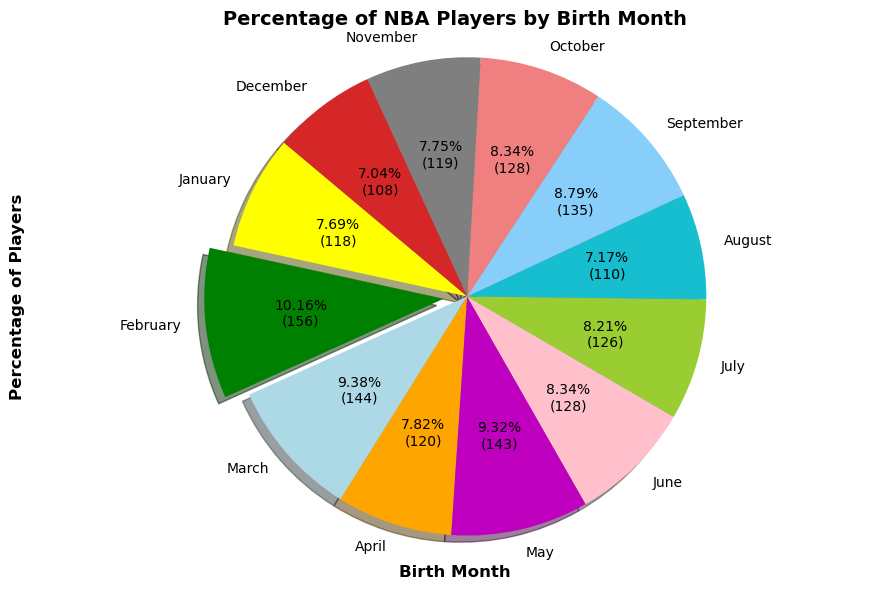

In [30]:
# 1. Percentage of NBA Players by Birth 
fig, ax = plt.subplots(figsize=(9, 6))
#fig, ax = plt.subplots(figsize=(14, 7))
#bar_container = ax.bar(sorted_months_players.index, sorted_months_players, color=mcolors.BASE_COLORS, edgecolor='black')
#ax.bar_label(bar_container, weight='bold', padding=3)

explode = (0,0.1,0,0,0,0,0,0,0,0,0,0)
colors = ["yellow","green","lightblue","orange","m","pink","yellowgreen","tab:cyan","lightskyblue","lightcoral","tab:gray", "tab:red"]
ax.pie(sorted_months_players, labels=sorted_months_players.index, explode=explode, shadow=True, autopct=format(sorted_months_players), startangle=140,
      colors=colors)

plt.axis("equal")
plt.title('Percentage of NBA Players by Birth Month', size=14, weight='bold')
plt.xlabel('Birth Month', size=12, weight='bold')
plt.ylabel('Percentage of Players', size=12, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Resources/birth_month_player_numbers.png")
plt.show()

## Which birth month produces the most #1 draft picks?

In [11]:
# Group data by colleges and sort by highest #1 draft picks
first_picks = full_data.loc[full_data["Draft Pick"] == "1st overall"][["Month", "Draft Pick"]]
first_picks_month_data = first_picks.groupby("Month")
most_picks = first_picks_month_data.count().sort_values(by="Draft Pick", ascending=False).squeeze()
display(most_picks.head())

Month
March       9
April       3
December    3
October     3
January     2
Name: Draft Pick, dtype: int64

In [12]:
# Find month with the highest number of players produced
print(f"The month produces the highest number of players is: {most_picks.index[0]} with a total of {most_picks.iloc[0]} players.")

The month produces the highest number of players is: March with a total of 9 players.


In [13]:
# Sort series by month
sorted_months_picks = most_picks.reindex(month_list)

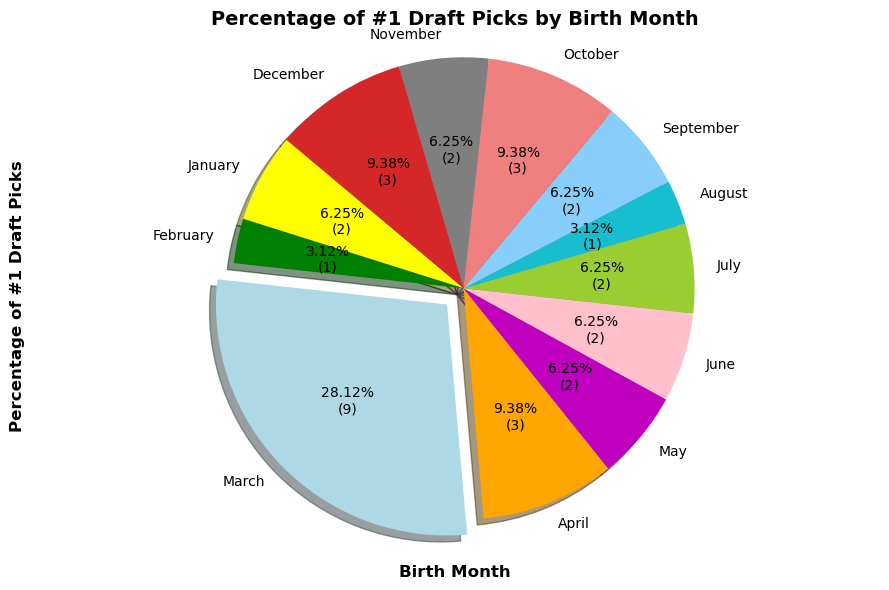

In [14]:
# 2. Percentage of #1 Draft Picks by Birth Month
fig, ax = plt.subplots(figsize=(9, 6))
#fig, ax = plt.subplots(figsize=(14, 7))
#bar_container = ax.bar(sorted_months_picks.index, sorted_months_picks, color=mcolors.TABLEAU_COLORS, edgecolor='black')
#ax.bar_label(bar_container, weight='bold', padding=3)

explode = (0,0,0.1,0,0,0,0,0,0,0,0,0)
ax.pie(sorted_months_picks, labels=sorted_months_picks.index, explode=explode, shadow=True, autopct=format(sorted_months_picks), startangle=140,
      colors=colors)

plt.axis("equal")
plt.title('Percentage of #1 Draft Picks by Birth Month', size=14, weight='bold')
plt.xlabel('Birth Month', size=12, weight='bold')
plt.ylabel('Percentage of #1 Draft Picks', size=12, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Resources/birth_month_draft_picks.png")
plt.show()

## Which birth month produces the highest average career earnings?

In [17]:
month_earnings = months_data["Total Earnings"].mean()
highest_month_earnings = month_earnings.sort_values(ascending=False)
highest_month_earnings.head()

Month
March        3.141049e+07
May          2.952011e+07
June         2.884637e+07
September    2.720196e+07
August       2.673069e+07
Name: Total Earnings, dtype: float64

In [18]:
# Find the birth month with the highest average career earnings
highest_value = "${:,.2f}".format(highest_month_earnings.iloc[0])
print(f"The birth month that produces the highest average earnings is: {highest_month_earnings.index[0]} with a total of {highest_value}")

The birth month that produces the highest average earnings is: March with a total of $31,410,487.40


## Which birth month produces the highest average career earnings adjusted to Sep. 1st 2023 inflation?

In [29]:
month_earnings_adjusted = months_data["Inflation-Adjusted Earnings"].mean()
highest_month_earnings_adjusted = month_earnings_adjusted.sort_values(ascending=False)
display(highest_month_earnings_adjusted.head())

# Find the birth month with the highest average career earnings adjusted to Sep. 1st 2023 inflation
highest_value = "${:,.2f}".format(highest_month_earnings_adjusted.iloc[0])
print(f"The birth month that produces the highest average earnings is: {highest_month_earnings_adjusted.index[0]} with a total of {highest_value}")

Month
March        4.902133e+07
May          4.546450e+07
June         4.365883e+07
September    4.228276e+07
August       4.091444e+07
Name: Inflation-Adjusted Earnings, dtype: float64

The birth month that produces the highest average earnings is: March with a total of $49,021,328.44


In [22]:
# Sort series by month
sorted_month_earnings = month_earnings.reindex(month_list)
sorted_month_earnings_adjusted = month_earnings_adjusted.reindex(month_list)

In [23]:
# Create a helper function to convert "−" into "-" to avoid float-conversion issue
def convert(num):
    if num[0] == "−":
        result = num.replace("−", "-")
    else:
        result = num
    return result

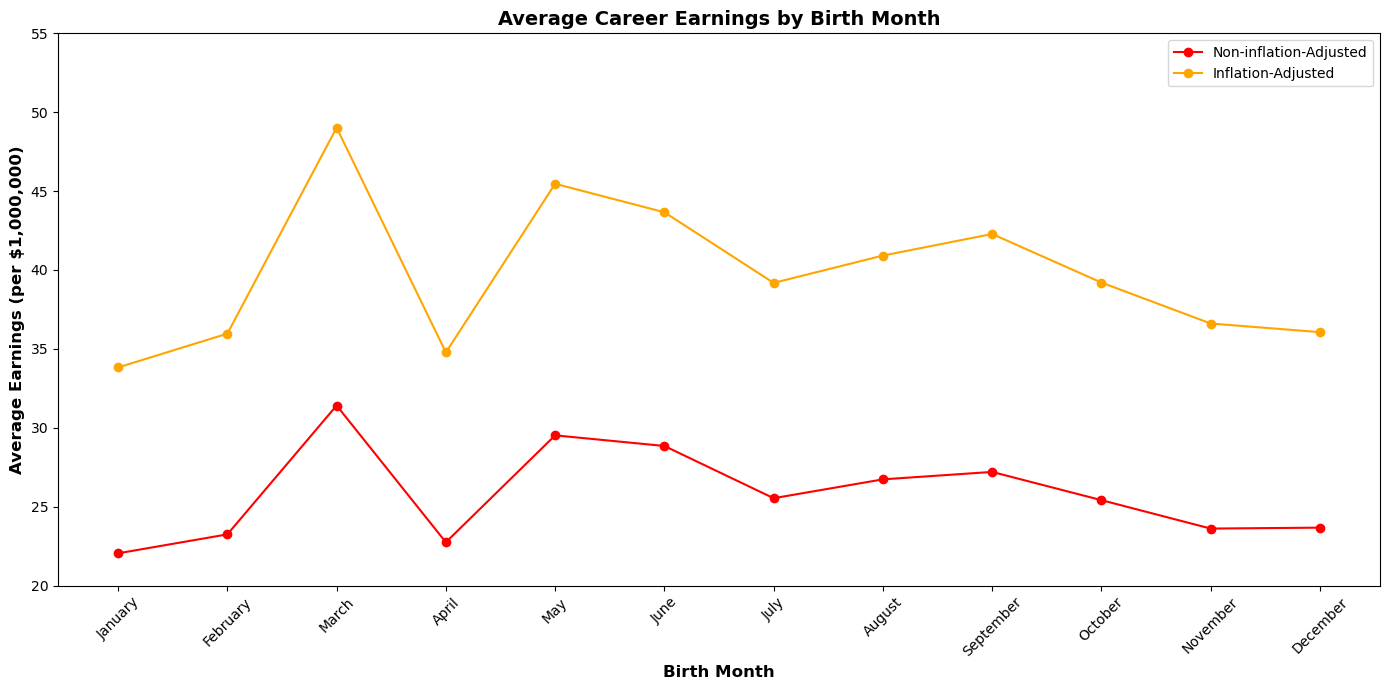

In [27]:
#Average Career Earnings by Birth Month (Non-inflation-Adjusted vs Inflation-Adjusted)
plt.figure(figsize=(14, 7))
sorted_month_earnings.plot(kind='line', marker='o', color='red')
sorted_month_earnings_adjusted.plot(kind='line', marker='o', color='orange')
plt.title('Average Career Earnings by Birth Month', size=14, weight='bold')
plt.xlabel('Birth Month', size=12, weight='bold')
plt.ylabel('Average Earnings (per $1,000,000)', size=12, weight='bold')

ylocs, ylabels = plt.yticks()
ylabels = [int(float(convert(label.get_text())) * 10) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)
plt.xticks(range(12), labels=month_list, rotation=45)
plt.legend(labels = ["Non-inflation-Adjusted", "Inflation-Adjusted"])
plt.tight_layout()
plt.savefig("Resources/birth_month_earnings.png")
plt.show()